# IFN645 Case Study 2
## Mining from Manufacturing, Supermarket, News Stories and Web Log Data

### Contents
1. [Clustering & Pre-processing](#clust)
2. [Association Mining](#association)
3. [Text Mining](#text)
4. [Web Mining](#web)

---
## Part 1: Clustering Pre-processing and K-means analysis<a name="clust"></a>
### 1. Can you identify data quality issues in this dataset such as unusual data types, missing values, etc?
In the process of importing the data, the dataframe.info() method can be used to evaluate the dataset.

In [25]:
import pandas as pd
import numpy as np
# Import Data from csv without skipping empty cells
df = pd.read_csv('Casestudy2-Data-Py/model_car_sales.csv', na_filter=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 8 columns):
LOCATION_NUMBER    675 non-null int64
REPORT_DATE        675 non-null object
DEALER_CODE        675 non-null object
UTE                675 non-null object
HATCH              675 non-null object
WAG0N              675 non-null object
SEDAN              675 non-null object
K__SALES_TOT       675 non-null object
dtypes: int64(1), object(7)
memory usage: 42.3+ KB


From the `info()` output, we can identify the following issues

#### Unusual Datatypes
<table>
<tr>
<th>Variable Name</th>
<th>Current Datatype</th>
<th>Desired Datatype</th>
</tr>
<tr>
<td>HATCH</td>
<td>Object</td>
<td>int64</td>
</tr>
<tr>
<td>SEDAN</td>
<td>Object</td>
<td>int64</td>
</tr>
<tr>
<td>WAGON</td>
<td>Object</td>
<td>int64</td>
</tr>
<tr>
<td>UTE</td>
<td>Object</td>
<td>int64</td>
</tr>
<tr>
<td>K_SALES_TOT </td>
<td>Object</td>
<td>int64</td>
</tr>
</table>
     
For the given data description, the fields `UTE`, `HATCH`,`SEDAN`, `WAG0N` and `K_SALES_TOT` should be interval/numerical values as opposed to objects.
By using the `.describe()` function, we may be able to uncover the source of the issues in the dataset

In [26]:
# print details for all variables in dataframe
for cols in df:
    print(df[cols].describe())
    print("-"*20)

count    675.0
mean     338.0
std      195.0
min        1.0
25%      169.5
50%      338.0
75%      506.5
max      675.0
Name: LOCATION_NUMBER, dtype: float64
--------------------
count            675
unique             1
top       2013-04-30
freq             675
Name: REPORT_DATE, dtype: object
--------------------
count          675
unique         675
top       Euro-244
freq             1
Name: DEALER_CODE, dtype: object
--------------------
count     675
unique    143
top          
freq       22
Name: UTE, dtype: object
--------------------
count     675
unique    518
top          
freq       22
Name: HATCH, dtype: object
--------------------
count     675
unique    426
top          
freq       22
Name: WAG0N, dtype: object
--------------------
count     675
unique    501
top          
freq       22
Name: SEDAN, dtype: object
--------------------
count     675
unique    109
top       932
freq       25
Name: K__SALES_TOT, dtype: object
--------------------


Analysis of the `.describe()` output show a number of unusual results which may explain the cause of the unusual data types.

For this output, `top` describes the most commonly occuring value in the dataset. For the fields `UTE`, `HATCH`, `WAG0N` and `SEDAN`, that value appears to be an empty string.

The output of the `value_counts()` function (see below) allow us to identify this as the root cause of our data abnormalities.

In [27]:
# Check for cause of issues in one of the variables
print(df['UTE'].value_counts())

       22
81     15
92     15
80     12
90     12
72     11
106    11
100    11
97     10
83     10
84     10
69      9
75      9
88      9
116     9
99      9
91      9
73      9
77      9
82      9
68      9
70      9
93      9
98      8
74      8
114     8
89      8
66      8
78      8
85      8
       ..
191     1
8       1
46      1
131     1
41      1
40      1
190     1
173     1
146     1
166     1
178     1
197     1
9       1
196     1
206     1
23      1
198     1
31      1
150     1
142     1
180     1
39      1
209     1
202     1
157     1
37      1
155     1
52      1
143     1
153     1
Name: UTE, Length: 143, dtype: int64


Additionally, we can isolate the rows containing the empty string in order to determine if there is a link between the missing variables in the data source.
By using the `.values()` or `as_matrix()` functions to gather all of the readings where UTE is equal to an empty string we ge the following output:

In [28]:
# See Rows where UTE contains empty string
df[df['UTE']==''].as_matrix()

array([[4, '2013-04-30', 'Euro-103', '', '', '', '', ''],
       [24, '2013-04-30', 'Euro-123', '', '', '', '', ''],
       [50, '2013-04-30', 'Euro-149', '', '', '', '', ''],
       [108, '2013-04-30', 'Euro-201', '', '', '', '', ''],
       [173, '2013-04-30', 'Euro-260', '', '', '', '', ''],
       [174, '2013-04-30', 'Euro-261', '', '', '', '', ''],
       [175, '2013-04-30', 'Euro-262', '', '', '', '', ''],
       [176, '2013-04-30', 'Euro-263', '', '', '', '', ''],
       [177, '2013-04-30', 'Euro-264', '', '', '', '', ''],
       [198, '2013-04-30', 'Euro-283', '', '', '', '', ''],
       [199, '2013-04-30', 'Euro-284', '', '', '', '', ''],
       [200, '2013-04-30', 'Euro-285', '', '', '', '', ''],
       [298, '2013-04-30', 'Euro-374', '', '', '', '', ''],
       [299, '2013-04-30', 'Euro-375', '', '', '', '', ''],
       [300, '2013-04-30', 'Euro-376', '', '', '', '', ''],
       [643, '2013-04-30', 'Euro-688', '', '', '', '', ''],
       [644, '2013-04-30', 'Euro-689', '', '

#### Missing Values
This coencides with the missing values found present in the `HATCH`,`SEDAN` and `WAG0N` fields as well, additionally identifying 22 rows where the `K_SALES_TOT` variable is also missing. A tabulated view of the results can be found below.

<table>
    <tr>
        <th>Variable Name</th>
        <th># Missing Values</th>
    </tr>
    <tr>
        <td>HATCH</td>
        <td>22</td>
    </tr>
    <tr>
        <td>SEDAN</td>
        <td>22</td>
    </tr>
    <tr>
        <td>WAGON</td>
        <td>22</td>
    </tr>
    <tr>
        <td>UTE</td>
        <td>22</td>
    </tr>
    <tr>
        <td>K_SALES_TOT</td>
        <td>22</td>
    </tr>
</table>

As imputing the values of these 22 rows may skew the results, the empty rows can be dropped without affecting data quality.

Then, the variables can be typecast to float values for use in the analysis.

In [29]:
df[['HATCH','SEDAN','WAG0N','UTE','K__SALES_TOT']] =\
        df[['HATCH','SEDAN','WAG0N','UTE','K__SALES_TOT']].replace('',np.nan).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 8 columns):
LOCATION_NUMBER    675 non-null int64
REPORT_DATE        675 non-null object
DEALER_CODE        675 non-null object
UTE                653 non-null float64
HATCH              653 non-null float64
WAG0N              653 non-null float64
SEDAN              653 non-null float64
K__SALES_TOT       653 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 42.3+ KB


Finally, visualisation of the data can assist in identifying any remaining data problems.
Using `seaborn` and `matplotlib`; we can graph the distributions for `UTE`, `HATCH`,`WAGON` and `SEDAN`.

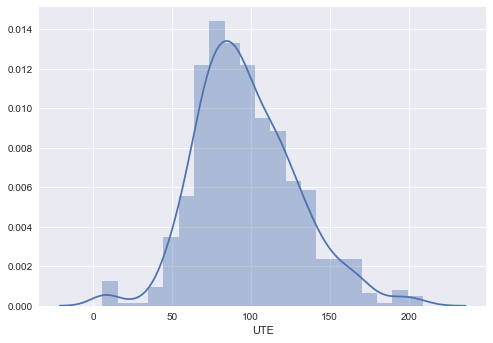

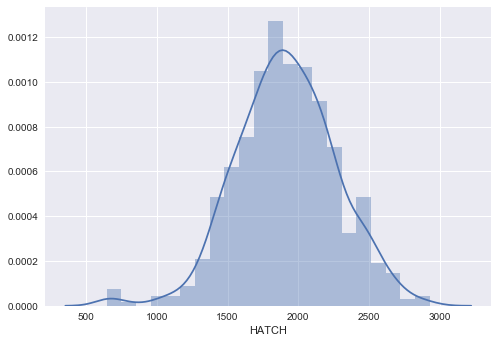

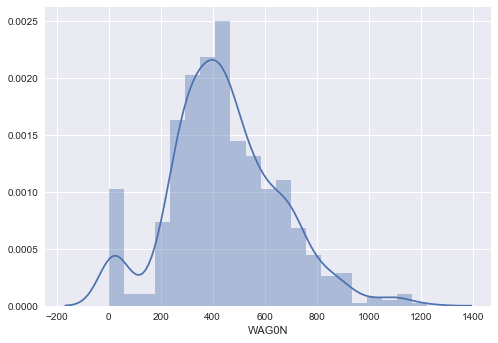

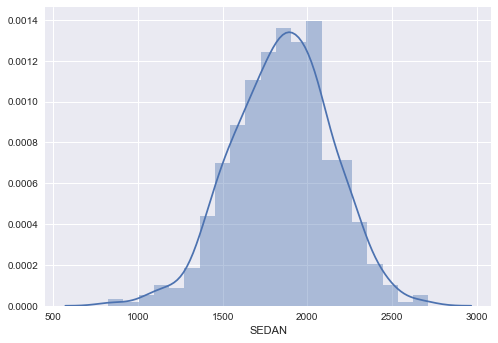

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of UTE
ute_dist = sns.distplot(df['UTE'].dropna())
plt.show()

# Distribution of Hatch
hatch_dist = sns.distplot(df['HATCH'].dropna())
plt.show()

# Distribution of Wagon
wagon_dist = sns.distplot(df['WAG0N'].dropna())
plt.show()

# Distribution of Sedan
sedan_dist = sns.distplot(df['SEDAN'].dropna())
plt.show()

As we can see in the distplots, there are a number of anomalies for the `WAG0N` variable. Increasing the number of bins can be used to better quanitfy the anomalous values, as seen below.

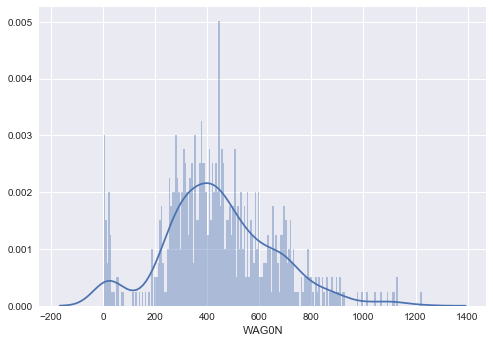

In [31]:
# Distribution of Wagon
wagon_dist = sns.distplot(df['WAG0N'].dropna(),bins=200)
plt.show()

As shown above, a number of dealerships reported Wagon Sales below 80 units. Isolating data corresponding to these values may yield an explanation for the unusually low sales of this model.

In [32]:
# Drop Outliers from WAG0N
df = df[df['WAG0N']>75]

### 2. What variables did you include in the analysis and what were their roles and measurement level set? Justify your choice.
For the purposes of clustering, we will include the `HATCH`, `SEDAN`, `WAG0N` and `UTE` variables.
These variables measure the number of sales of a particular model of vehicle made by particular a car dealership (signified by `LOCATION_NUMBER` or `DEALER_CODE`).

The variables `LOCATION_NUMBER` and `DEALER_CODE` will not be included in the analysis, as unique variables do not contribute to clustering models. Additionally, `REPORT_DATE` will not be included in the analysis as it contains the same value for all observations. Finally, `K_SALES_TOT` will also be discluded from the Dataset, as the derrived value is not useful for our analysis.

In [33]:
df2 = df[['UTE','HATCH','WAG0N','SEDAN']].dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612 entries, 0 to 674
Data columns (total 4 columns):
UTE      612 non-null float64
HATCH    612 non-null float64
WAG0N    612 non-null float64
SEDAN    612 non-null float64
dtypes: float64(4)
memory usage: 23.9 KB


### 3. Identify a car model that is underperforming in sales. Based on your reporting, the company does not want to focus thir efforts on this car model anymore and has decided to drop it from manufacturing. Now onwards, the selected car product should not be part of analysis
By plotting the distributions of each model of car, it is possible to identify how car sales are distributed among dealerships.

Below are the sales distributions of each car model.

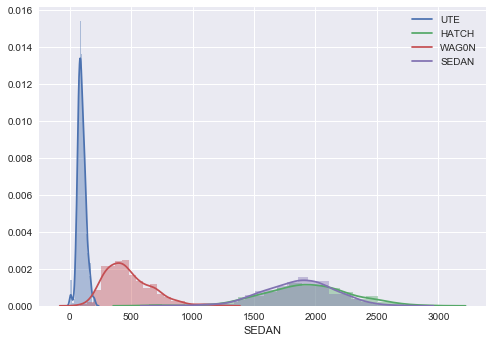

In [34]:
# Distribution of all Models
comb_dist = sns.distplot(df2['UTE'].dropna(),kde_kws={"label":"UTE"})
comb_dist = sns.distplot(df2['HATCH'].dropna(),kde_kws={"label":"HATCH"})
comb_dist = sns.distplot(df2['WAG0N'].dropna(),kde_kws={"label":"WAG0N"})
comb_dist = sns.distplot(df2['SEDAN'].dropna(),kde_kws={"label":"SEDAN"})
plt.show()

As shown above, the `UTE` model has the poorest performance among vehicle models, with the majority of dealerships selling fewer than 100 models over the sales period.

Due to this, the `UTE` model will be removed from the analysis as instructed by the brief.

In [35]:
df2.drop(['UTE'],axis=1,inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612 entries, 0 to 674
Data columns (total 3 columns):
HATCH    612 non-null float64
WAG0N    612 non-null float64
SEDAN    612 non-null float64
dtypes: float64(3)
memory usage: 19.1 KB


## Task 2. The First Clustering Model
### 1. Build a default clustering model with K = 3
Using the data prepaired in the previous section, a cluster can be generated to compare the sales of 2 models of vehicle.

As KMeans clustering is based on euclidean distance from the mean, the input variables must be scaled to ensure weighting is consistant across values.

In [36]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# convert the dataset into a matrix
X = df2.as_matrix()

# scale the variables
# s = StandardScaler()
# X = s.fit_transform(X)

# random state variable
rs = 42

# set the random state for the model
model = KMeans(n_clusters=3, random_state=rs).fit(X)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)
print("Centroid Locations:")
for c in model.cluster_centers_:
    print(c)

Sum of intra-cluster distance: 62107739.4788
Centroid Locations:
[ 1500.10778443   634.43712575  2048.30538922]
[ 2315.38829787   405.71276596  1586.81382979]
[ 1923.57976654   423.17120623  1956.6770428 ]


In [37]:
# assign cluster to each record in X
y = model.predict(X)

df2['Cluster_ID'] = y

# print the number of members for each cluster
print("Distribution of Cluster Members")
print(df2['Cluster_ID'].value_counts())

Distribution of Cluster Members
2    257
1    188
0    167
Name: Cluster_ID, dtype: int64


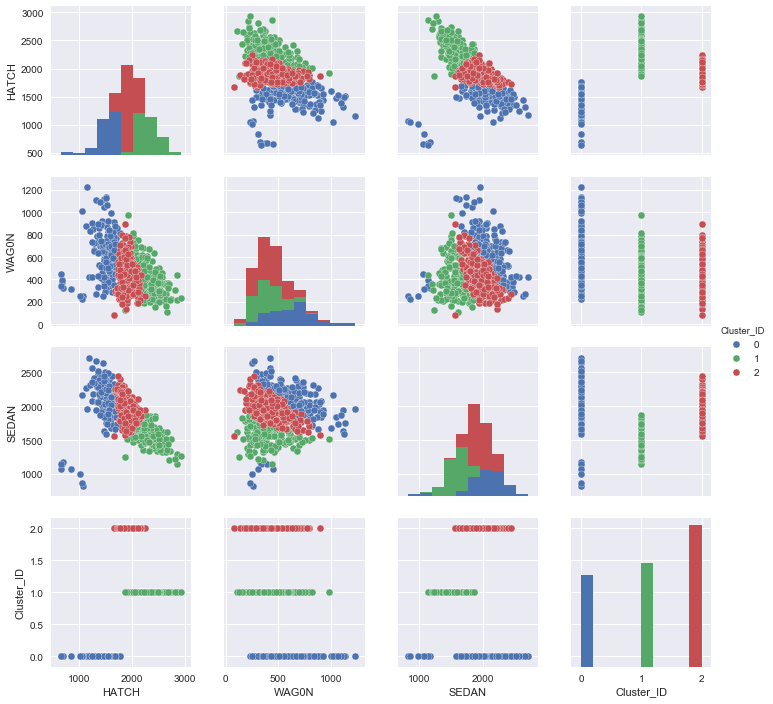

In [38]:
# Generate Pairplot for clusters
cluster = sns.pairplot(df2, hue='Cluster_ID')
plt.show()

Distribution for cluster 0


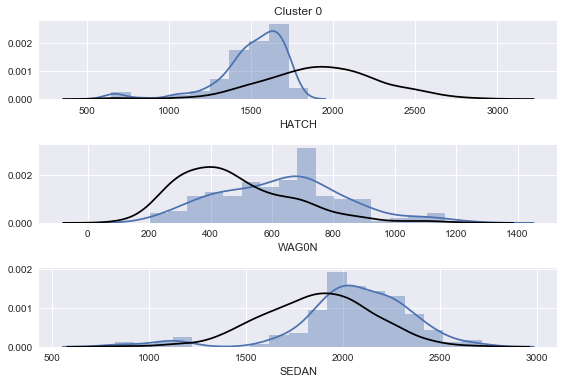

Distribution for cluster 1


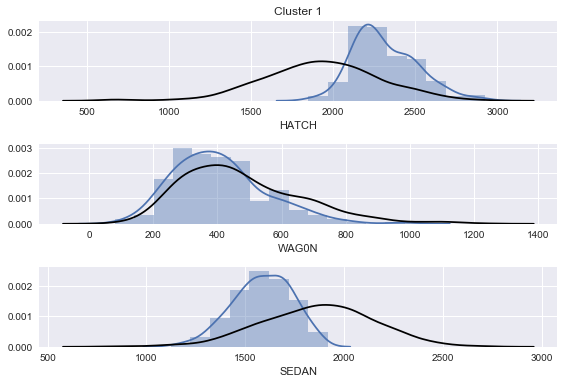

Distribution for cluster 2


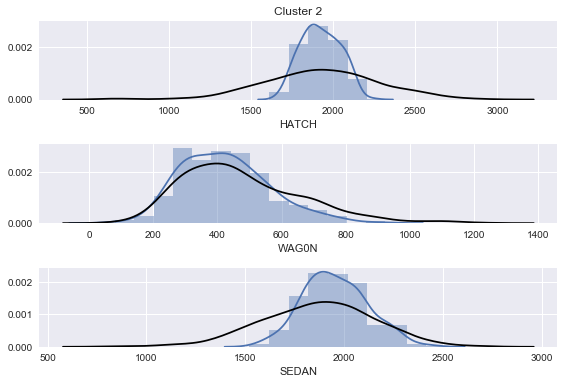

In [39]:
# prepare the column and bin size. Increase bin size to be more specific, but 20 is more than enough
cols = ['HATCH', 'WAG0N', 'SEDAN']
n_bins = 20

# inspecting all clusters
clusters_to_inspect = [0,1,2]

for cluster in clusters_to_inspect:
    # inspecting cluster 0
    print("Distribution for cluster {}".format(cluster))

    # create subplots
    fig, ax = plt.subplots(nrows=3)
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(df2[col]), max(df2[col]), 20)
        # plot distribution of the cluster using histogram
        sns.distplot(df2[df2['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
        # plot the normal distribution with a black line
        sns.distplot(df2[col], bins=bins, ax=ax[j], hist=False, color="k")

    plt.tight_layout()
    plt.show()

Cluster 0 primarily sells Sedans, with their next highest model being Hatchs.

Cluster 1 primarily sells mostly Hatch's, with about equal sales of Sedans and Wagons.

Cluster 2 primarily sells Wagons and Sedans.

In [40]:
# scale the variables
s = StandardScaler()
X = s.fit_transform(X)

# set the random state for the model
model = KMeans(n_clusters=3, random_state=rs).fit(X)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)
print("Centroid Locations:")
for c in model.cluster_centers_:
    print(c)

Sum of intra-cluster distance: 818.187030285
Centroid Locations:
[-0.3478678  -0.47269896  0.84814697]
[ 0.91645842 -0.44107126 -0.8372986 ]
[-0.85527722  1.27837251  0.06332008]


In [41]:
# assign cluster to each record in X
y = model.predict(X)

df2['Cluster_ID'] = y

# print the number of members for each cluster
print("Distribution of Cluster Members")
print(df2['Cluster_ID'].value_counts())

Distribution of Cluster Members
1    233
0    218
2    161
Name: Cluster_ID, dtype: int64


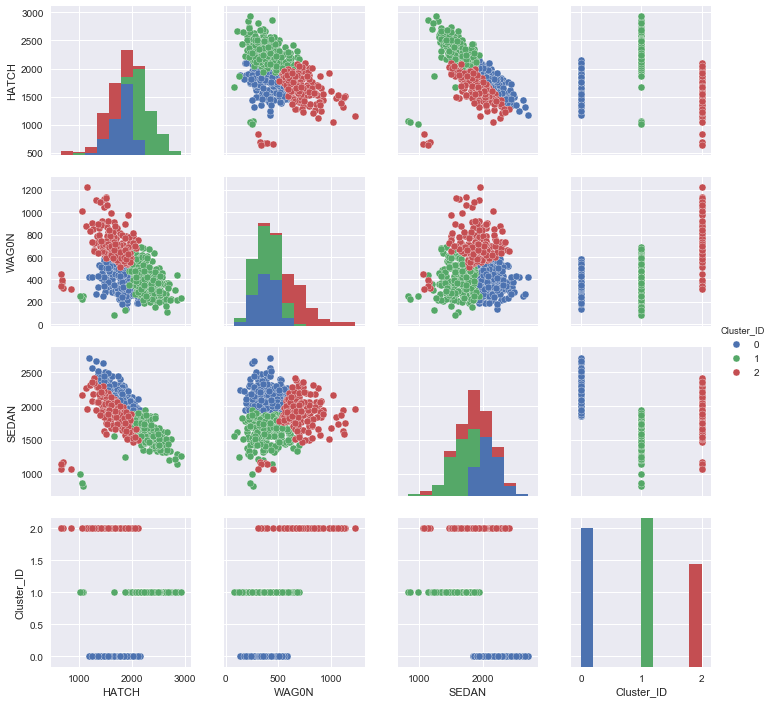

In [42]:
# Generate Pairplot for clusters
cluster = sns.pairplot(df2, hue='Cluster_ID')
plt.show()


#### a. How many records are assigned into each cluster?
#### b. Plot the cluster distribution using pairplot. Explain key characteristics of each culuster/segment

Distribution for cluster 0


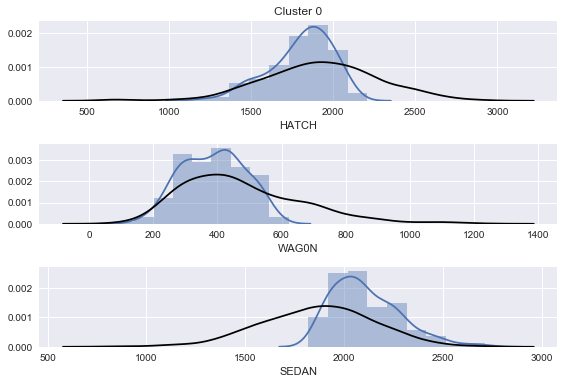

Distribution for cluster 1


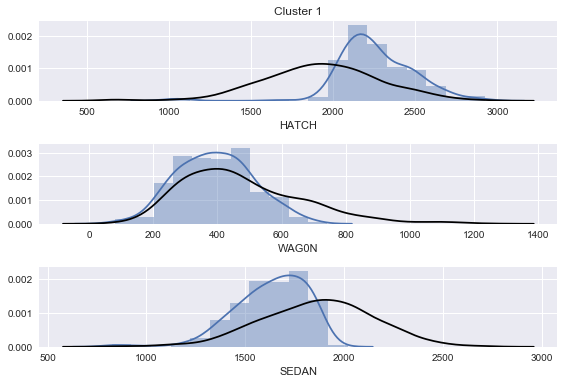

Distribution for cluster 2


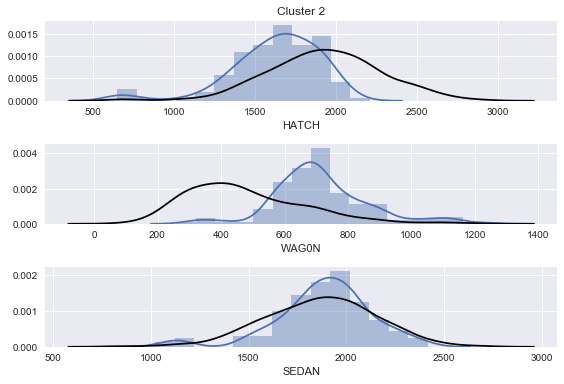

In [43]:
# inspecting all clusters
clusters_to_inspect = [0,1,2]

for cluster in [0,1,2]:
    # inspecting cluster 0
    print("Distribution for cluster {}".format(cluster))

    # create subplots
    fig, ax = plt.subplots(nrows=3)
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(df2[col]), max(df2[col]), 20)
        # plot distribution of the cluster using histogram
        sns.distplot(df2[df2['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
        # plot the normal distribution with a black line
        sns.distplot(df2[col], bins=bins, ax=ax[j], hist=False, color="k")

    plt.tight_layout()
    plt.show()

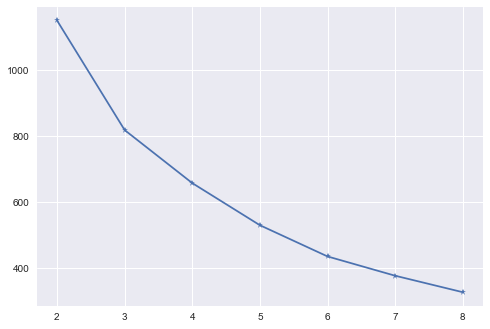

In [44]:
# Lists for clusters and costs
clusters = []
inertia_vals = []

# calculate inertia for k
for k in range (2 ,9 , 1):
    # train with the current K value
    model = KMeans(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit(X)
    
    # append model to lits
    clusters.append(model)
    inertia_vals.append(model.inertia_)
    
# Plot the outpt of inertai vs the value of K
plt.plot(range(2,9,1), inertia_vals, marker='*')
plt.show()

In [45]:
from sklearn.metrics import silhouette_score

print(clusters[2])
print("Silhouette Score for K=4", silhouette_score(X, clusters[2].predict(X)))

print(clusters[3])
print("Silhouette Score for K=5", silhouette_score(X, clusters[3].predict(X)))

print(clusters[4])
print("Silhouette Score for K=6", silhouette_score(X, clusters[4].predict(X)))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
Silhouette Score for K=4 0.376227906377
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
Silhouette Score for K=5 0.336441875103
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
Silhouette Score for K=6 0.331011015963


Sum of intra-cluster distance: 657.324009295
Centroid Locations:
[ 0.9608289  -0.43070542 -0.80380197]
[-0.75769684  1.34077009  0.17830522]
[-0.34178609 -0.48237524  0.84544755]
[-3.13404974 -0.80506732 -2.8595708 ]
Distribution of Cluster Members
0    230
2    216
1    157
3      9
Name: Cluster_ID, dtype: int64


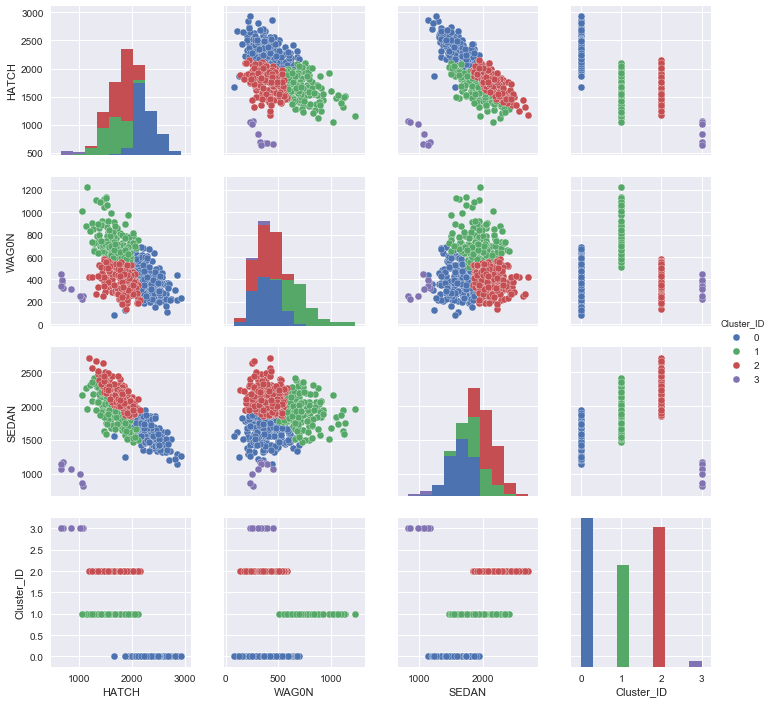

In [46]:
# set the random state for the model
model = KMeans(n_clusters=4, random_state=rs).fit(X)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)
print("Centroid Locations:")
for c in model.cluster_centers_:
    print(c)
    
# assign cluster to each record in X
y = model.predict(X)

df2['Cluster_ID'] = y

# print the number of members for each cluster
print("Distribution of Cluster Members")
print(df2['Cluster_ID'].value_counts())

# Generate Pairplot for clusters
cluster = sns.pairplot(df2, hue='Cluster_ID')
plt.show()

- Cluster 0 Consists primarily of Sedans with Hatchs being the next most sold model
- Cluster 1 comprises the majority of the dataset. Contains mostly Hatchs with an equal distribution of Wagons and Sedans
- Cluster 2 Consists of Mostly Sedans and Wagons with some Hatchs
- Cluster 3 Consists of equal distributions of Hatch and Sedans with fewer Wagons

Distribution for cluster 0


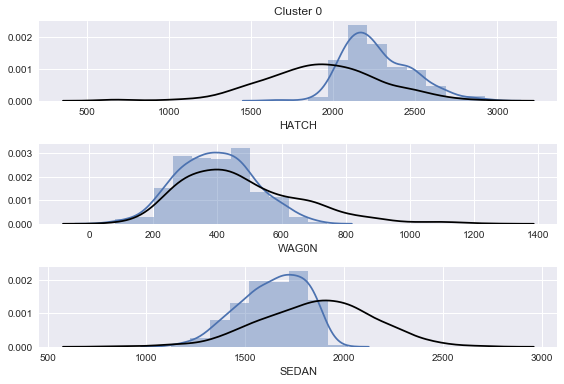

Distribution for cluster 1


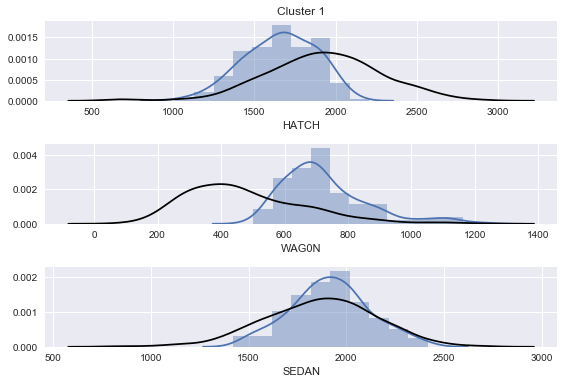

Distribution for cluster 2


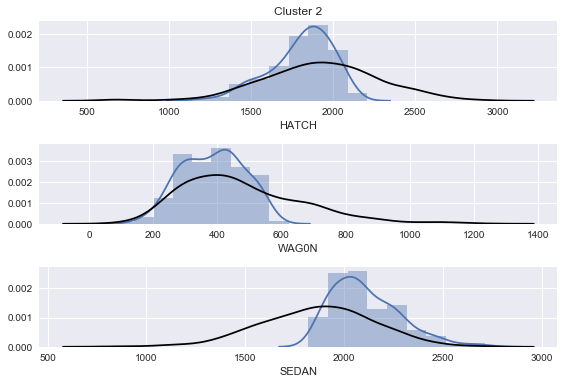

Distribution for cluster 3


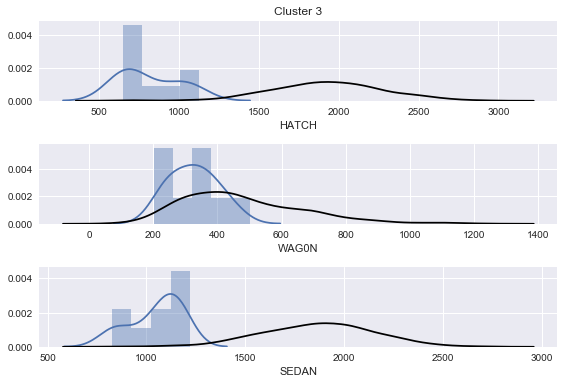

In [47]:
for cluster in [0,1,2,3]:
    print("Distribution for cluster {}".format(cluster))

    # create subplots
    fig, ax = plt.subplots(nrows=3)
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(df2[col]), max(df2[col]), 20)
        # plot distribution of the cluster using histogram
        sns.distplot(df2[df2['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
        # plot the normal distribution with a black line
        sns.distplot(df2[col], bins=bins, ax=ax[j], hist=False, color="k")

    plt.tight_layout()
    plt.show()

---
## Part 2: Association Mining and it's data Pre-processing<a name="association"></a>

### 1. Can you identify data quality issues in this dataset for performing association mining?


In [31]:
import pandas as pd

# load the transaction dataset
df = pd.read_csv('D:/QUT-Sem3/645/Assessment2/Casestudy2-Data-Py/pos_transactions.csv')

# info and the first 10 transactions
print(df.info())
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459258 entries, 0 to 459257
Data columns (total 5 columns):
Location           459258 non-null int64
Transaction_Id     459258 non-null int64
Transactin_Date    459258 non-null object
Product_Name       459258 non-null object
Quantity           459258 non-null int64
dtypes: int64(3), object(2)
memory usage: 17.5+ MB
None
   Location  Transaction_Id Transactin_Date    Product_Name  Quantity
0         2           12359      2012-10-23       Candy Bar         1
1         9           12362      2012-10-23   Pain Reliever         1
2         9           12362      2012-10-23   Pain Reliever         1
3         5           12365      2012-10-23      Toothpaste         1
4         2           12371      2012-10-23             Bow         1
5         6           12380      2012-10-23  Greeting Cards         1
6         1           12383      2012-10-23   Pain Reliever         1
7         1           12383      2012-10-23   Pain Reliever        

From the first 10 transaction shown above, we can easily see that there are duplicated transactions in the dataset.
That can be seen clearly by grouping the data (see the result below)

In [18]:
df.groupby(df.columns.tolist(),as_index=False).size().sort_values(ascending = False).reset_index().rename(columns={0: 'Frequency'})

,Location,Transaction_Id,Transactin_Date,Product_Name,Quantity,Frequency
0,1,816536,2012-10-27,Magazine,1,135
1,6,79610,2012-10-24,Toothpaste,1,96
2,7,1143932,2012-10-29,Greeting Cards,1,95
3,8,205484,2012-10-24,Pain Reliever,1,83
4,8,34322,2012-10-23,Candy Bar,1,78
5,6,1014407,2012-10-28,Bow,1,75
6,10,427835,2012-10-26,Magazine,1,73
7,6,362087,2012-10-25,Candy Bar,1,72
8,7,205490,2012-10-24,Bow,1,72
9,1,1068674,2012-10-28,Magazine,1,71


The 'Frequency' column in the result above indicates the number of duplicated transactions for each unique transaction in the dataset. Therefore, we will drop those duplicated transactions except for the first occurence.

In [22]:
df = df.drop_duplicates(subset=None, keep='first', inplace=False)

As were are looking to generate association rules from items purchased by each transaction, we need to group our Transaction_Id and then generate a list of all items purchased.

In [32]:
# group by Transaction_Id, then list all items
transactions = df.groupby(['Transaction_Id'])['Product_Name'].apply(list)

print(transactions.head(10))

Transaction_Id
12359                                  [Candy Bar]
12362               [Pain Reliever, Pain Reliever]
12365                                 [Toothpaste]
12371                                        [Bow]
12380                             [Greeting Cards]
12383               [Pain Reliever, Pain Reliever]
12386               [Pain Reliever, Pain Reliever]
12392                          [Shampoo, Magazine]
12401    [Candy Bar, Candy Bar, Pencils, Magazine]
12404                                  [Candy Bar]
Name: Product_Name, dtype: object


### 2. What variables did you include in the analysis and what were their roles and measurement level set? Justify your choice.
Association mining usually consists of two variables: a transaction ID and an item. Due to the main target which is to find out the associations between items purchased from the health and beauty aids department and the stationary department, the Product_Name should be chosen as the target variable and the Transaction_ID is chosen as ID. In summary, the variables included in the analysis as the below table.

<table>
    <tr>
        <th>Variable Name</th>
        <th>Role</th>
        <th>Measurement Level</th>
    </tr>
    <tr>
        <td>Product_Name</td>
        <td>Target</td>
        <td>Nominal</td>
    </tr>
    <tr>
        <td>Transaction_Id</td>
        <td>ID</td>
        <td>Nominal</td>
    </tr>
</table>

### 3. Conduct association mining and answer the following:
#### a. What is the highest lift value for the resulting rules? Which rule has this value?

Once the transactions table contains all items purchased in each transaction, we will run the apyori model with the pre-processed transactions and min_support of 0.02

In [67]:
from apyori import apriori

# type cast the transactions from pandas into normal list format and run apriori
transaction_list = list(transactions)
results = list(apriori(transaction_list, min_support=0.02))

# print first 5 rules
print(results[:5])

[RelationRecord(items=frozenset({'Bow'}), support=0.054645, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Bow'}), confidence=0.054645, lift=1.0)]), RelationRecord(items=frozenset({'Candy Bar'}), support=0.171005, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Candy Bar'}), confidence=0.171005, lift=1.0)]), RelationRecord(items=frozenset({'Greeting Cards'}), support=0.146885, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Greeting Cards'}), confidence=0.146885, lift=1.0)]), RelationRecord(items=frozenset({'Magazine'}), support=0.241305, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Magazine'}), confidence=0.241305, lift=1.0)]), RelationRecord(items=frozenset({'Pain Reliever'}), support=0.0267, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Pain Reliever'}), confidence=0.0267, lift=1.0)])]


In [68]:
def convert_apriori_results_to_pandas_df(results):
    rules = []
    
    for rule_set in results:
        for rule in rule_set.ordered_statistics:
            # items_base = left side of rules, items_add = right side
            # support, confidence and lift for respective rules
            rules.append([','.join(rule.items_base), ','.join(rule.items_add),
                         rule_set.support, rule.confidence, rule.lift]) 
    
    # typecast it to pandas df
    return pd.DataFrame(rules, columns=['Left_side', 'Right_side', 'Support', 'Confidence', 'Lift']) 

result_df = convert_apriori_results_to_pandas_df(results)

print(result_df.head(20))

         Left_side      Right_side   Support  Confidence      Lift
0                              Bow  0.054645    0.054645  1.000000
1                        Candy Bar  0.171005    0.171005  1.000000
2                   Greeting Cards  0.146885    0.146885  1.000000
3                         Magazine  0.241305    0.241305  1.000000
4                    Pain Reliever  0.026700    0.026700  1.000000
5                          Pencils  0.134925    0.134925  1.000000
6                             Pens  0.143575    0.143575  1.000000
7                          Perfume  0.089960    0.089960  1.000000
8                   Photo Processi  0.058480    0.058480  1.000000
9                          Shampoo  0.033800    0.033800  1.000000
10                            Soap  0.043025    0.043025  1.000000
11                      Toothbrush  0.067350    0.067350  1.000000
12                      Toothpaste  0.160425    0.160425  1.000000
13                  Wrapping Paper  0.050990    0.050990  1.00

In order to find out the highest lift value for the resulting rules, we will sort the rules by Lift using the code below:

In [69]:
# sort all acquired rules descending by lift# sort a 
result_df = result_df.sort_values(by='Lift', ascending=False)
print(result_df.head(10))

         Left_side      Right_side   Support  Confidence      Lift
36         Perfume      Toothbrush  0.021820    0.242552  3.601370
37      Toothbrush         Perfume  0.021820    0.323979  3.601370
14       Candy Bar  Greeting Cards  0.043660    0.255314  1.738191
15  Greeting Cards       Candy Bar  0.043660    0.297239  1.738191
25         Pencils  Greeting Cards  0.029240    0.216713  1.475392
24  Greeting Cards         Pencils  0.029240    0.199067  1.475392
20       Candy Bar      Toothpaste  0.039780    0.232625  1.450053
21      Toothpaste       Candy Bar  0.039780    0.247966  1.450053
18       Candy Bar         Pencils  0.033015    0.193065  1.430903
19         Pencils       Candy Bar  0.033015    0.244691  1.430903


From the result above, the highest lift value is 3.60
There are two rules having this value: Perfume -> Toothbrush and Toothbrush -> Perfume

#### b. What is the highest confidence value for the resulting rules? Which rule has this value?

In [ ]:
In order to find out the highest confidence value for the resulting rules, we will sort the rules by Confidence using the code below:

In [70]:
# sort all acquired rules descending by Confidence# sort a 
result_df = result_df.sort_values(by='Confidence', ascending=False)
print(result_df.head(10))

         Left_side      Right_side   Support  Confidence      Lift
37      Toothbrush         Perfume  0.021820    0.323979  3.601370
15  Greeting Cards       Candy Bar  0.043660    0.297239  1.738191
14       Candy Bar  Greeting Cards  0.043660    0.255314  1.738191
21      Toothpaste       Candy Bar  0.039780    0.247966  1.450053
22  Greeting Cards        Magazine  0.036335    0.247370  1.025136
19         Pencils       Candy Bar  0.033015    0.244691  1.430903
36         Perfume      Toothbrush  0.021820    0.242552  3.601370
3                         Magazine  0.241305    0.241305  1.000000
16       Candy Bar        Magazine  0.040535    0.237040  0.982325
29         Pencils        Magazine  0.031630    0.234427  0.971495


From the result above, the highest confidence value is 32.39%.
The rule has this value is Magazie & Greeding Cards -> Candy Bar  

#### c. Plot the confidence, lift, support of the resulting rules? Interpret them to discuss the rule-set obtained

### 4. The store is particularly interested in products that individuals purchase when they buy “Pens”.
#### a. How many rules are in the subset?

#### b. Based on the rules, what are the other products these individuals are most likely to purchase?

### 5. How the outcome of this study can be used by decision makers?

---
## Part 3: Text Mining<a name="text"></a>





---
## Part 4: Web Mining<a name="web"></a>



